# Exploring `demand_gegis` outputs

The code below initialise the to be used packages. Further, `_sets_path_to_root` makes sure that we set the path to your pypsa-africa folder which we need for reading files. Please, also make sure you set up the `pypsa-africa` environment which is shared as `environment.yml` in the envs folder.

In [1]:
import atlite
import cartopy.crs as ccrs
import xarray as xr
import geopandas as gpd
import geoviews as gv
import holoviews as hv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show
from atlite.gis import shape_availability, ExclusionContainer

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")


plt.rcParams['figure.figsize'] = [7, 7]
%matplotlib inline

This is the repository path:  /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/pypsa-africa
Had to go 1 folder(s) up.


## Let's open the demand timeseries from GEGIS
Demand timeseries are calculated in GEGIS based on paramters such as GDP, population and temperature data. Since each of this parameters can be provided in high resolution, we can derive timeseries with GEGIS for arbitrary regions for multi-years.

GEGIS is currently written in Julia. A rewrite to Python can help improving GEGIS and including other factors such as humidity, building area, building archetype information. These information will help the AI to train more accurately regional differences for demand timeseries. Alternative approaches to GEGIS such as botton-up statistical ones can also be developed in parallel.


In [7]:
demand_path = os.path.realpath("data")+"/ssp2-2.6/2030/era5_2018/Africa.nc"
demand_path = xr.open_dataset(demand_path)

In [8]:
demand_path

<xarray.Dataset>
Dimensions:             (time: 8760, region_code: 57)
Coordinates:
  * time                (time) datetime64[ns] 2018-01-01 ... 2018-12-31T23:00:00
    region_name         (region_code) object ...
  * region_code         (region_code) object 'AO' 'BF' 'BI' ... 'ZA' 'ZM' 'ZW'
Data variables:
    Electricity demand  (region_code, time) float64 ...

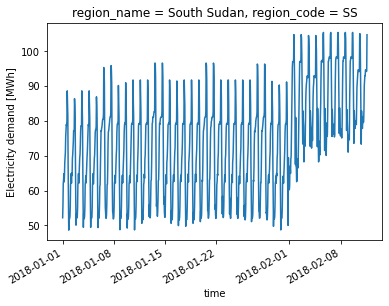

In [9]:
demand_path["Electricity demand"].isel(region_code=sum(range(10)), time=range(0,1000)).plot()